# Nothing But `True`

## The Hook

Here's the idea: the expression `True` in Python evaluates numerically to `1`.

I found it quite amusing the first time I saw it. Today, I showed off my pitiful party trick to my friend Coen:

In [1]:
print(True + True)

2


2! How silly!

But Coen, inspired by the profound boring of Mech 325, had bigger plans.

After I played around combining different operators with `True` to print out different numbers, he asked a question that sent me into a math rabbit hole: "Can you get it to output $e$ (Euler's number) using the limit definition?"

You betcha.

So we do our best to construct a big number in place of infinity. I call it 'true' to add to the confusion. Then we can use the expression:

$$e = \lim_{n \to \infty} (1 + \frac1{n})^n$$

In [2]:
true = ((True + True) ** (True + True)) ** (True + True)
true = (True + True + True + True) ** true

(True + True / true) ** true

2.7182818281425956

And it works! Close enough.

Next we wanted to approximate pi using an infinite sum.

Here's the link because I don't feel like typing it out: https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80

We need two variables here: one for the iteration index, and one to contain the sum. I use 'true' and 'TRUE' as variable names, respectively, in keeping with the deliberately confusing coding style. We had to get creative with the expressions for the large number (used to approximate infinity) since if it was too small the value does not converge nicely and if it is too large it takes forever to run.

In [3]:
true = False
TRUE = False
while (true < ((True + True) ** (True + True)) ** (True + True) ** (True + True + True)
       * (True << (True + True + True + True + True + True))):
    TRUE += (False - True) ** true / ((True + True) * true + True)
    true += True

TRUE * (True + True + True + True)

3.1415924151711234

Not bad! Feel free to play around with the nuber of loops (the value in the while loop) to see how the value varies.

But when we looked to make other numbers, and I suggested trying to construct my 8-digit student number (which I will not disclose), I realized that it is quite tricky to construct a large number with a relatively concise expression involving `True`s.

We can grow the value quickly using exponentiation (`**`) and bit-shifting (`<<`), and technically we can make any rational number by just summing `True`s over and over$^\ast$... But it isn't satisfying.

_$^\ast$ If you forget about floating point precision_

## The Puzzle

Here's the challenge I want to solve: How can we express a number, purely in terms of Python operators and the "True" expression. That is, **no literals**!

To constrain the problem, let's say we can only use the operators listed in https://docs.python.org/3/reference/lexical_analysis.html#operators, allowing parentheses, and let's aim to be able to construct any **arbitrary integer** with as few `True`s as possible.

I used a while loop in my previous approximation for pi, but let's only allow expressions with operators for this problem, to keep things constrained. No variables either.

Here are the rules in bullet points:
1. Only operators, `True`s and parentheses allowed!
2. Any [Python operators](https://docs.python.org/3/reference/lexical_analysis.html#operators) are allowed, unary or binary.
3. We must be able to construct any integer.
4. Parentheses are allowed at will, but more concise expressions, following spacing conventions, are preferred (let's say as a tiebreaker).


Let's move forward with a few strategies.

### Strategy 1: Just Add Shit Together

To start, it's nice to know that we have _some_ strategy that can build any number. Let's just add `True` together repeatedly until we reach the number needed. For negative integers, we can subtract instead. For zero, we can do `True - True`.

In [4]:
def strategy_1(target: int) -> str:
    if target == 0:
        return "True - True"
    elif target < 0:
        expr = "-True"
        for i in range(abs(target) - 1):
            expr += " - True"
        return expr
    else:
        expr = "True"
        for i in range(target - 1):
            expr += " + True"
        return expr

Let's give it a go!

In [5]:
from typing import Callable

def test_strategy(func: Callable, test_targets) -> None:
    for targ in test_targets:
        expr = func(targ)
        result = eval(expr)
        assert result == targ, f"Expression '{expr}' does not evaluate to {targ}! Got {result} instead."
        print(f"{expr} = {result}")

test_strategy(strategy_1, [2, 5, -3, 20])

True + True = 2
True + True + True + True + True = 5
-True - True - True = -3
True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True = 20


Ok it works but as expected it isn't the most efficient... I don't think this will cut it for my 8-digit student number.

### Strategy 2: Bit-Shift Boogaloo

Let's look into what operators we have available to us. There are a few categories.

**Arithmetic**: [+, -, *, **, /, //, and %]. Very useful stuff here! Addition, multiplication and exponentiation help us grow our values at different rates, and other operators can help us reach different values.

**Boolean Logic**: [<, >, <=, >=, ==, and !=]. These don't help much because they only evaluate to 0 or 1, which we can already easily make.

**Special Stuff**: [@, :=]. Pretty much useless here. To be honest, I had to look up what these even did, but it turns out it's nothing helpful for our puzzle. Here are some links if you are interested: https://stackoverflow.com/a/28997112, https://docs.python.org/3/whatsnew/3.8.html#assignment-expressions

**Bitwise Operators**: [<<, >>, &, |, ^, and ~]. These bad boys and girls are the real magic sauce. Highly precise and super versatile.

In particular, let's look into a way to construct an arbitrary integer in ~log(n) 'length' complexity using the bit-shift operator, `<<`.

In [6]:
def strategy_2_v0(target: int) -> str:
    # Convert to binary and cut off "0b" prefix
    binary_string = bin(target)[2:]
    expr = ""
    num_bits = len(binary_string)
    for i, char in enumerate(binary_string):
        if char == '1':
            expr += f"(True << {num_bits - i - 1}) + "
    return expr[:-3]  # Chop off trailing " + "

test_strategy(strategy_2_v0, [2, 5, 20])

(True << 1) = 2
(True << 2) + (True << 0) = 5
(True << 4) + (True << 2) = 20


This is a good start, but there are several issues.

1. It doesn't work with negative numbers you doof!

Yeah. I forget the theory for twos complement (how negative integers are represented in bits), so I'll have to figure that out and fix it. Edit: Never mind! I can be lazy about this and just make the absolute value and insert a unary `-` operator in front of the whole thing!

2. Even worse -- you're using integer numeric literals!! That's not allowed!!

Indeed, but here's where things get interesting. _I've already created a method that can build any arbitrary integer._ So I can create a hybrid method which uses Strategy 1 to create the integers to use in Strategy 2!

Later, I'll work on optimizing the method to use whichever method is the fastest to generate each integer.

First, let's fix the method to work with negative numbers.

In [7]:
def strategy_2_v1(target: int) -> str:
    # Convert absolute value to binary and cut off binary prefix
    binary_string = bin(abs(target))[2:]  # Prefix is "0b"
    expr = ""

    num_bits = len(binary_string)
    for i, char in enumerate(binary_string):
        if char == '1':
            expr += f"(True << {num_bits - i - 1}) + "

    expr = expr[:-3]  # Chop off trailing " + "

    if target < 0:
        expr = "-(" + expr + ")"  # Invert the sign for negative numbers

    return expr

test_strategy(strategy_2_v1, [2, 5, -3, 20])

(True << 1) = 2
(True << 2) + (True << 0) = 5
-((True << 1) + (True << 0)) = -3
(True << 4) + (True << 2) = 20


Great! The strategy now works with negative numbers. We use bit shifting on the absolute value, then put back the sign after the fact.

Next, let's use the arbitrary integer generation from strategy 1 to replace the integers we use. This completes Strategy 2.

In [8]:
def strategy_2(target: int) -> str:
    # Convert absolute value to binary and cut off binary prefix
    binary_string = bin(abs(target))[2:]  # Prefix is "0b"
    expr = ""

    num_bits = len(binary_string)
    for i, char in enumerate(binary_string):
        if char == '1':
            bit_shift_count = num_bits - i - 1
            expr += f"(True << {strategy_1(bit_shift_count)}) + "

    expr = expr[:-3]  # Chop off trailing " + "

    if target < 0:
        expr = "-(" + expr + ")"  # Invert the sign for negative numbers

    return expr

test_strategy(strategy_2, [2, 5, -3, 20])

(True << True) = 2
(True << True + True) + (True << True - True) = 5
-((True << True) + (True << True - True)) = -3
(True << True + True + True + True) + (True << True + True) = 20


I think our new function is ready for some tougher numbers. How about an 8-digit number, like 12345678?

In [9]:
test_strategy(strategy_2, [12345678])

(True << True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True + True + True + True + True + True + True + True + True + True) + (True << True + True + True + True

Dear god that's not pretty.

How many `True`s is that, really?

In [10]:
def count_trues(func: Callable, target: int) -> int:
    return func(target).count("True")

count_trues(strategy_2, 12345678)

160

At least it's better than Strategy 1 by a long shot.

I won't try to compute it, but obviously Strategy 1 would have needed 12345678 `True`s to get the job done.

Let's get a better picture of how this method performs by plotting the number of `True`s needed vs the value.

From now on, **I'll call the number of `True`s needed the "score" of the strategy.**

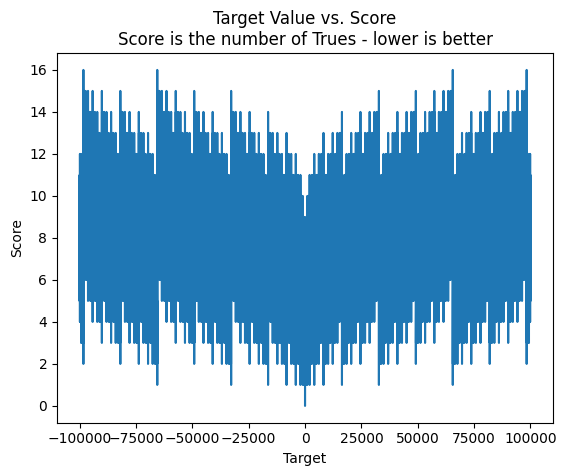

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a numpy vectorized scoring function
score_strategy_2 = np.vectorize(lambda t: count_trues(strategy_2_v0, t))

targs = np.linspace(-100000, 100000, 200001).astype(int)
counts = score_strategy_2(targs)

plt.plot(targs, counts)
plt.xlabel("Target")
plt.ylabel("Score")
plt.title("Target Value vs. Score\n"
          "Score is the number of Trues - lower is better")
plt.show()

Let's look at some larger values too.

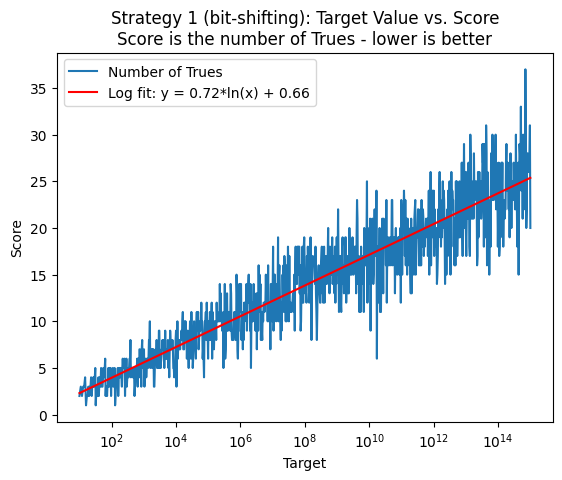

In [16]:
from scipy.optimize import curve_fit

targs_exp = np.linspace(1, 15, 1000)
targs = np.around((10 ** targs_exp)).astype(int)
counts = score_strategy_2(targs)

def log_fit(x, a, b):
    return a * np.log(x) + b

params, covariance = curve_fit(log_fit, targs, counts)

plt.plot(targs, counts, label="Number of Trues")
plt.xscale('log')
plt.xlabel("Target")
plt.ylabel("Score")
plt.title("Strategy 1 (bit-shifting): Target Value vs. Score\n"
          "Score is the number of Trues - lower is better")

x_fit = np.linspace(min(targs), max(targs), 1000)
y_fit = log_fit(x_fit, *params)

a, b = params
fit_label = f"Log fit: y = {a:.2f}*ln(x) + {b:.2f}"

plt.plot(x_fit, y_fit, label=fit_label, color='red')

plt.legend()
plt.show()

Note: the above plot only shows 1000 sampled values, so there may be more outliers whose values are not shown.

I chose to exclude negative numbers here because the values are the same (there's just an added parenthesis pair and minus sign).

Looks like the "True" counting is actually pretty fast -- let's see how many we can plot while still computing every single value and not skipping any integers.

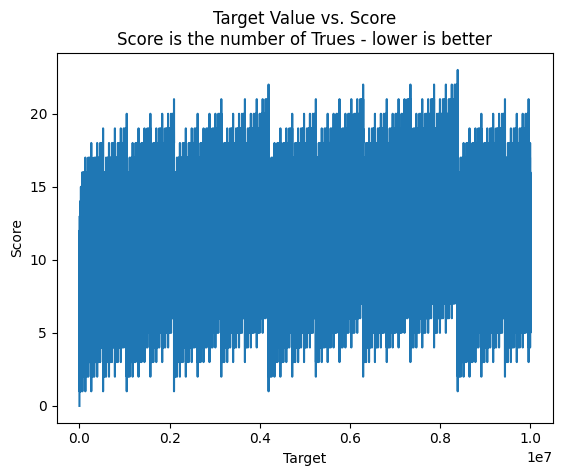

In [19]:
N = 10000000
targs = np.linspace(0, N, N + 1).astype(int)
counts = score_strategy_2(targs)

plt.plot(targs, counts)
plt.xlabel("Target")
plt.ylabel("Score")
plt.title("Target Value vs. Score\n"
          "Score is the number of Trues - lower is better")
plt.show()

Ok I'm not going to wait much longer than that. Still, not a bad result. This could definitely be optimized a lot, but I don't really care right now.

Doing this enables some more fun processing: Let's take a fourier transform! I expect to see big amplitude spikes at powers of 2, since these are when you go from many bit shifts (e.g. 111111111) to few (1000000000).

In [20]:
fourier_transform = np.fft.rfft(counts)
freq_axis = np.fft.rfftfreq(counts.size, d=1)  # The frequency will be 1/target

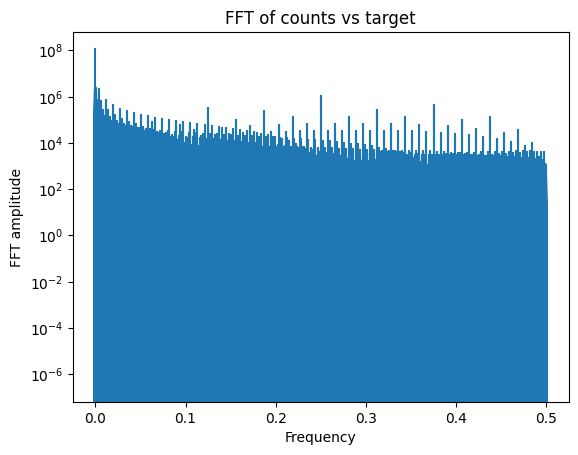

In [24]:
plt.plot(freq_axis, np.real(fourier_transform))
plt.xlabel("Frequency")
plt.ylabel("FFT amplitude")
plt.yscale('log')
plt.title("FFT of counts vs target")
plt.rcParams['agg.path.chunksize'] = 200
plt.show()

Ok IDK what to make of this really. We see a bunch of evenly spaced spikes, and they probably have to do with powers of 2...

I think what we might be seing is the superposition of the fourier transform of the counts caused by the number of bits in the target vs the counts caused by the shifting required to shift the bits. But I'm getting bored of this method and I want to move on to bigger things.

Originally I was planning to explore a hybrid strategy which used the optimal combination of addition and bit shifts to produce a value. But I have bigger goals now and I want to work on a more general optimal strategy computation... That I shall continue in **part 2!**